In [2]:
# downloading the dataset
!pip install kaggle
!kaggle competitions download -c house-prices-advanced-regression-techniques
!tar -xf house-prices-advanced-regression-techniques.zip

You should consider upgrading via the 'c:\users\miros\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [399]:
import pandas as pd
import numpy as np
from myutils import *
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

train = pd.read_csv("train.csv", index_col="Id")

X = train.copy()
y = X.pop('SalePrice')

# optional - replace to try different models
#y = pd.qcut(y, 30, labels=False)

In [400]:
print_missing(X)

LotFrontage: 259 missing (17.74%). Type: float64
Alley: 1369 missing (93.77%). Type: object
MasVnrType: 8 missing (0.55%). Type: object
MasVnrArea: 8 missing (0.55%). Type: float64
BsmtQual: 37 missing (2.53%). Type: object
BsmtCond: 37 missing (2.53%). Type: object
BsmtExposure: 38 missing (2.60%). Type: object
BsmtFinType1: 37 missing (2.53%). Type: object
BsmtFinType2: 38 missing (2.60%). Type: object
Electrical: 1 missing (0.07%). Type: object
FireplaceQu: 690 missing (47.26%). Type: object
GarageType: 81 missing (5.55%). Type: object
GarageYrBlt: 81 missing (5.55%). Type: float64
GarageFinish: 81 missing (5.55%). Type: object
GarageQual: 81 missing (5.55%). Type: object
GarageCond: 81 missing (5.55%). Type: object
PoolQC: 1453 missing (99.52%). Type: object
Fence: 1179 missing (80.75%). Type: object
MiscFeature: 1406 missing (96.30%). Type: object


In [401]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2077)

In [402]:
for_med = ['GarageYrBlt', 'YearRemodAdd']
for_con = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'TotRmsAbvGrd', 'LotArea',
 'GarageArea', 
 'WoodDeckSF',
 'EnclosedPorch',
 'GarageCars',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFullBath',
 'BsmtHalfBath',
'LowQualFinSF',
 'HalfBath',
 'OpenPorchSF',
 'GrLivArea',
 '3SsnPorch',
 '1stFlrSF',
 'FullBath',
 'ScreenPorch',
 'TotalBsmtSF',
 'MiscVal',
 'Fireplaces',
'KitchenAbvGr',
 'BedroomAbvGr']
for_onehot = ['Alley', 'MasVnrType', 'Electrical', 'GarageType', 'MiscFeature',
             'MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
             'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','CentralAir','Functional','PavedDrive',
             'SaleType','SaleCondition','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
       'Fence', 'HeatingQC', "KitchenQual", "ExterCond", "ExterQual"]

# FE (from https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1/notebook?scriptVersionId=12846740)
X_train['YrBltAndRemod'] = X_train['YearBuilt'] + X_train['YearRemodAdd']
X_test['YrBltAndRemod'] = X_test['YearBuilt'] + X_test['YearRemodAdd']

X_train['TotalSF'] = X_train['TotalBsmtSF'] + X_train['1stFlrSF'] + X_train['2ndFlrSF']
X_test['TotalSF'] = X_test['TotalBsmtSF'] + X_test['1stFlrSF'] + X_test['2ndFlrSF']

X_train['Total_sqr_footage'] = X_train['BsmtFinSF1'] + X_train['BsmtFinSF2'] + \
                                 X_train['1stFlrSF'] + X_train['2ndFlrSF']
X_test['Total_sqr_footage'] = X_test['BsmtFinSF1'] + X_test['BsmtFinSF2'] + \
                                 X_test['1stFlrSF'] + X_test['2ndFlrSF']

X_train['Total_Bathrooms'] = (X_train['FullBath'] + (0.5 * X_train['HalfBath']) + \
                               X_train['BsmtFullBath'] + (0.5 * X_train['BsmtHalfBath']))
X_test['Total_Bathrooms'] = (X_test['FullBath'] + (0.5 * X_test['HalfBath']) + \
                               X_test['BsmtFullBath'] + (0.5 * X_test['BsmtHalfBath']))

X_train['Total_porch_sf'] = X_train['OpenPorchSF'] + X_train['3SsnPorch'] + \
                              X_train['EnclosedPorch'] + X_train['ScreenPorch'] + \
                              X_train['WoodDeckSF']
X_test['Total_porch_sf'] = X_test['OpenPorchSF'] + X_test['3SsnPorch'] + \
                              X_test['EnclosedPorch'] + X_test['ScreenPorch'] + \
                              X_test['WoodDeckSF']

X_train['haspool'] = X_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
X_test['haspool'] = X_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

X_train['has2ndfloor'] = X_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
X_test['has2ndfloor'] = X_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

X_train['hasgarage'] = X_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
X_test['hasgarage'] = X_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

X_train['hasbsmt'] = X_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
X_test['hasbsmt'] = X_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

X_train['hasfireplace'] = X_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
X_test['hasfireplace'] = X_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# drop uninformative
X_train = X_train.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
X_test = X_test.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

<ipython-input-402-35401de15136>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['YrBltAndRemod'] = X_train['YearBuilt'] + X_train['YearRemodAdd']
<ipython-input-402-35401de15136>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['YrBltAndRemod'] = X_test['YearBuilt'] + X_test['YearRemodAdd']
<ipython-input-402-35401de15136>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [403]:
# impute missing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline_med = Pipeline([
    ('imputer_med', SimpleImputer(strategy='median'))
])

num_pipeline_con = Pipeline([
    ('imputer_con', SimpleImputer(strategy='constant', fill_value=0))
])

cat_pipeline_onehot = Pipeline([
    ('imputer_na', SimpleImputer(strategy='constant', fill_value='NA')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline_med', num_pipeline_med, for_med),
        ('num_pipeline_con', num_pipeline_con, for_con),
        ('cat_pipeline_onehot', cat_pipeline_onehot, for_onehot)
    ], remainder='passthrough')

In [404]:
X_preprocessed = preprocessor.fit_transform(X_train)
X_preprocessed.shape

(1168, 305)

In [405]:
# I wish there was an easier way to extract column names after transformation
col_names = preprocessor.transformers_[0][2] + \
preprocessor.transformers_[1][2] + \
list(preprocessor.transformers_[2][1]['onehot'].get_feature_names()) + \
[X_train.iloc[:, col].name for col in preprocessor.transformers_[3][2]] # remainder columns

In [406]:
X_train_preprocessed = pd.DataFrame(X_preprocessed, columns=col_names)

In [407]:
X_train_preprocessed.head()

,GarageYrBlt,YearRemodAdd,LotFrontage,MasVnrArea,BsmtFinSF1,2ndFlrSF,TotRmsAbvGrd,LotArea,GarageArea,WoodDeckSF,EnclosedPorch,GarageCars,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,LowQualFinSF,HalfBath,OpenPorchSF,GrLivArea,3SsnPorch,1stFlrSF,FullBath,ScreenPorch,TotalBsmtSF,MiscVal,Fireplaces,KitchenAbvGr,BedroomAbvGr,x0_Grvl,x0_NA,x0_Pave,x1_BrkCmn,x1_BrkFace,x1_NA,x1_None,x1_Stone,x2_FuseA,x2_FuseF,x2_FuseP,x2_Mix,x2_SBrkr,x3_2Types,x3_Attchd,x3_Basment,x3_BuiltIn,x3_CarPort,x3_Detchd,x3_NA,x4_Gar2,x4_NA,x4_Othr,x4_Shed,x4_TenC,x5_C (all),x5_FV,x5_RH,x5_RL,x5_RM,x6_IR1,x6_IR2,x6_IR3,x6_Reg,x7_Bnk,x7_HLS,x7_Low,x7_Lvl,x8_Corner,x8_CulDSac,x8_FR2,x8_FR3,x8_Inside,x9_Gtl,x9_Mod,x9_Sev,x10_Blmngtn,x10_Blueste,x10_BrDale,x10_BrkSide,x10_ClearCr,x10_CollgCr,x10_Crawfor,x10_Edwards,x10_Gilbert,x10_IDOTRR,x10_MeadowV,x10_Mitchel,x10_NAmes,x10_NPkVill,x10_NWAmes,x10_NoRidge,x10_NridgHt,x10_OldTown,x10_SWISU,x10_Sawyer,x10_SawyerW,x10_Somerst,x10_StoneBr,x10_Timber,x10_Veenker,x11_Artery,x11_Feedr,x11_Norm,x11_PosA,x11_PosN,x11_RRAe,x11_RRAn,x11_RRNe,x11_RRNn,x12_Artery,x12_Feedr,x12_Norm,x12_PosA,x12_PosN,x12_RRAe,x12_RRAn,x12_RRNn,x13_1Fam,x13_2fmCon,x13_Duplex,x13_Twnhs,x13_TwnhsE,x14_1.5Fin,x14_1.5Unf,x14_1Story,x14_2.5Fin,x14_2.5Unf,x14_2Story,x14_SFoyer,x14_SLvl,x15_Flat,x15_Gable,x15_Gambrel,x15_Hip,x15_Mansard,x15_Shed,x16_ClyTile,x16_CompShg,x16_Membran,x16_Metal,x16_Roll,x16_Tar&Grv,x16_WdShake,x16_WdShngl,x17_AsbShng,x17_AsphShn,x17_BrkComm,x17_BrkFace,x17_CBlock,x17_CemntBd,x17_HdBoard,x17_ImStucc,x17_MetalSd,x17_Plywood,x17_Stone,x17_Stucco,x17_VinylSd,x17_Wd Sdng,x17_WdShing,x18_AsbShng,x18_AsphShn,x18_Brk Cmn,x18_BrkFace,x18_CBlock,x18_CmentBd,x18_HdBoard,x18_ImStucc,x18_MetalSd,x18_Other,x18_Plywood,x18_Stone,x18_Stucco,x18_VinylSd,x18_Wd Sdng,x18_Wd Shng,x19_BrkTil,x19_CBlock,x19_PConc,x19_Slab,x19_Stone,x19_Wood,x20_Floor,x20_GasA,x20_GasW,x20_Grav,x20_OthW,x20_Wall,x21_N,x21_Y,x22_Maj1,x22_Maj2,x22_Min1,x22_Min2,x22_Mod,x22_Sev,x22_Typ,x23_N,x23_P,x23_Y,x24_COD,x24_CWD,x24_Con,x24_ConLD,x24_ConLI,x24_ConLw,x24_New,x24_Oth,x24_WD,x25_Abnorml,x25_AdjLand,x25_Alloca,x25_Family,x25_Normal,x25_Partial,x26_Ex,x26_Fa,x26_Gd,x26_NA,x26_TA,x27_Fa,x27_Gd,x27_NA,x27_Po,x27_TA,x28_Av,x28_Gd,x28_Mn,x28_NA,x28_No,x29_ALQ,x29_BLQ,x29_GLQ,x29_LwQ,x29_NA,x29_Rec,x29_Unf,x30_ALQ,x30_BLQ,x30_GLQ,x30_LwQ,x30_NA,x30_Rec,x30_Unf,x31_Ex,x31_Fa,x31_Gd,x31_NA,x31_Po,x31_TA,x32_Fin,x32_NA,x32_RFn,x32_Unf,x33_Ex,x33_Fa,x33_Gd,x33_NA,x33_Po,x33_TA,x34_Ex,x34_Fa,x34_Gd,x34_NA,x34_Po,x34_TA,x35_GdPrv,x35_GdWo,x35_MnPrv,x35_MnWw,x35_NA,x36_Ex,x36_Fa,x36_Gd,x36_Po,x36_TA,x37_Ex,x37_Fa,x37_Gd,x37_TA,x38_Ex,x38_Fa,x38_Gd,x38_Po,x38_TA,x39_Ex,x39_Fa,x39_Gd,x39_TA,MSSubClass,OverallQual,OverallCond,YearBuilt,PoolArea,MoSold,YrSold,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1999.0,1996.0,76.0,0.0,0.0,780.0,8.0,7630.0,672.0,344.0,40.0,2.0,0.0,360.0,0.0,0.0,0.0,0.0,0.0,1812.0,0.0,1032.0,2.0,0.0,360.0,0.0,1.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,

In [350]:
#############
### TRAIN ###
#############
# BINS = 4

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, log_loss, accuracy_score

train_error, test_error = [], []
max_leaf_range = np.arange(10, 300, int(300/25))
for max_leaf in max_leaf_range:
    rforest = RandomForestClassifier(n_estimators=1, max_leaf_nodes=max_leaf, bootstrap=False, n_jobs=-1, random_state=2077)
    rforest.fit(X_train_preprocessed, y_train)
    
    y_train_pred = rforest.predict(X_train_preprocessed)
    train_error.append(accuracy_score(y_train, y_train_pred))

    X_test_transformed = preprocessor.transform(X_test)
    y_test_pred = rforest.predict(X_test_transformed)
    test_error.append(accuracy_score(y_test, y_test_pred))
 
max_tree_range = np.arange(1, 100, int(100/25))
for max_tree in max_tree_range:
    rforest = RandomForestClassifier(n_estimators=max_tree, max_leaf_nodes=max_leaf, bootstrap=False, n_jobs=-1, random_state=2077)
    rforest.fit(X_train_preprocessed, y_train)
    
    y_train_pred = rforest.predict(X_train_preprocessed)
    train_error.append(accuracy_score(y_train, y_train_pred))

    X_test_transformed = preprocessor.transform(X_test)
    y_test_pred = rforest.predict(X_test_transformed)
    test_error.append(accuracy_score(y_test, y_test_pred))

<Figure size 576x360 with 0 Axes>

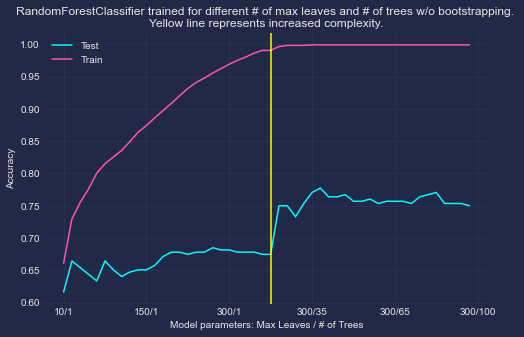

In [382]:
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")

plt.rcParams["figure.figsize"] = (8,5)

fig, ax = plt.subplots()

plt.plot(test_error, label='Test')
plt.plot(train_error, label='Train')
plt.axvline(x=len(test_error)/2, ymin=0, ymax=1, color='yellow')
plt.xlabel("Model parameters: Max Leaves / # of Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.title('''RandomForestClassifier trained for different # of max leaves and # of trees w/o bootstrapping. 
Yellow line represents increased complexity.''')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1:-1] = ["10/1", "150/1", "300/1", "300/35", "300/65", "300/100"]

ax.set_xticklabels(labels)

plt.show()

In [396]:
#############
### TRAIN ###
#############
# BINS = 30

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, log_loss, accuracy_score

train_error, test_error = [], []
max_leaf_range = np.arange(10, 1000, int(1000/25))
for max_leaf in max_leaf_range:
    rforest = RandomForestClassifier(n_estimators=1, max_leaf_nodes=max_leaf, bootstrap=False, n_jobs=-1, random_state=2077)
    rforest.fit(X_train_preprocessed, y_train)
    
    y_train_pred = rforest.predict(X_train_preprocessed)
    train_error.append(accuracy_score(y_train, y_train_pred))

    X_test_transformed = preprocessor.transform(X_test)
    y_test_pred = rforest.predict(X_test_transformed)
    test_error.append(accuracy_score(y_test, y_test_pred))
 
max_tree_range = np.arange(1, 500, int(500/25))
for max_tree in max_tree_range:
    rforest = RandomForestClassifier(n_estimators=max_tree, max_leaf_nodes=max_leaf, bootstrap=False, n_jobs=-1, random_state=2077)
    rforest.fit(X_train_preprocessed, y_train)
    
    y_train_pred = rforest.predict(X_train_preprocessed)
    train_error.append(accuracy_score(y_train, y_train_pred))

    X_test_transformed = preprocessor.transform(X_test)
    y_test_pred = rforest.predict(X_test_transformed)
    test_error.append(accuracy_score(y_test, y_test_pred))

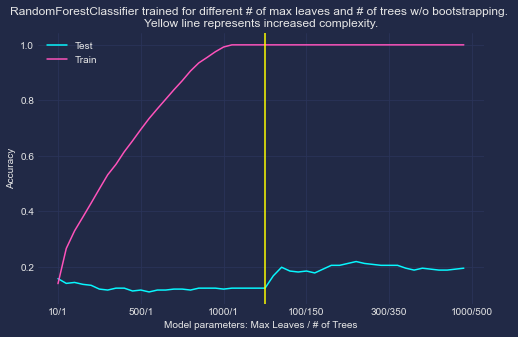

In [398]:
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")

plt.rcParams["figure.figsize"] = (8,5)

fig, ax = plt.subplots()

plt.plot(test_error, label='Test')
plt.plot(train_error, label='Train')
plt.axvline(x=len(test_error)/2, ymin=0, ymax=1, color='yellow')
plt.xlabel("Model parameters: Max Leaves / # of Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.title('''RandomForestClassifier trained for different # of max leaves and # of trees w/o bootstrapping. 
Yellow line represents increased complexity.''')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1:-1] = ["10/1", "500/1", "1000/1", "100/150", "300/350", "1000/500"]

ax.set_xticklabels(labels)

plt.show()

In [412]:
#############
### TRAIN ###
#############
# Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

train_error, test_error = [], []
max_leaf_range = np.arange(10, 500, int(500/25))
for max_leaf in max_leaf_range:
    rforest = RandomForestRegressor(n_estimators=1, max_leaf_nodes=max_leaf, bootstrap=False, n_jobs=-1, random_state=2077)
    rforest.fit(X_train_preprocessed, y_train)
    
    y_train_pred = rforest.predict(X_train_preprocessed)
    train_error.append(mean_absolute_error(y_train, y_train_pred))

    X_test_transformed = preprocessor.transform(X_test)
    y_test_pred = rforest.predict(X_test_transformed)
    test_error.append(mean_absolute_error(y_test, y_test_pred))
 
max_tree_range = np.arange(1, 1000, int(1000/25))
for max_tree in max_tree_range:
    rforest = RandomForestRegressor(n_estimators=max_tree, max_leaf_nodes=max_leaf, bootstrap=False, n_jobs=-1, random_state=2077)
    rforest.fit(X_train_preprocessed, y_train)
    
    y_train_pred = rforest.predict(X_train_preprocessed)
    train_error.append(mean_absolute_error(y_train, y_train_pred))

    X_test_transformed = preprocessor.transform(X_test)
    y_test_pred = rforest.predict(X_test_transformed)
    test_error.append(mean_absolute_error(y_test, y_test_pred))

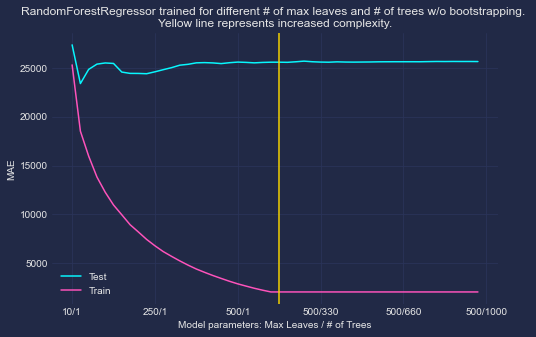

In [451]:
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")

plt.rcParams["figure.figsize"] = (8,5)

fig, ax = plt.subplots()

plt.plot(test_error, label='Test')
plt.plot(train_error, label='Train')
plt.axvline(x=len(test_error)/2, ymin=0, ymax=1, color='#F5D300')
plt.xlabel("Model parameters: Max Leaves / # of Trees")
plt.ylabel("MAE")
plt.legend()
plt.title('''RandomForestRegressor trained for different # of max leaves and # of trees w/o bootstrapping. 
Yellow line represents increased complexity.''')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1:-1] = ["10/1", "250/1", "500/1", "500/330", "500/660", "500/1000"]

ax.set_xticklabels(labels)

plt.show()

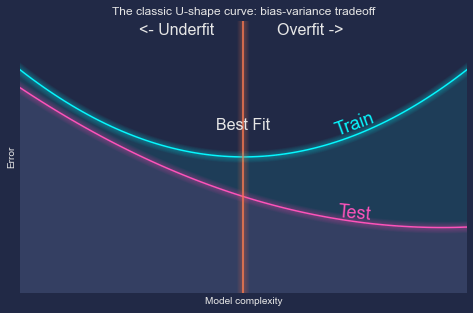

In [462]:
# generate title picture
plt.style.use("cyberpunk")

fig, ax = plt.subplots()
x = np.linspace(-1, 1, 100)
y1 = x**2 + 10
y2 = -0.2916961 - 0.6403888*x + 0.4497815*x**2 + 10
plt.plot(x, y1, label='Train')
plt.plot(x, y2, label='Test')
plt.axvline(x=0, ymin=0, ymax=1, color='coral')
plt.ylim(-1+10,1+10)
plt.xlim(-0.8, 0.8)

plt.text(0.5, 0.6, 'Best Fit', horizontalalignment='center', transform=ax.transAxes, fontsize=16)
plt.text(0.35, 0.95, '<- Underfit', horizontalalignment='center', transform=ax.transAxes, fontsize=16)
plt.text(0.65, 0.95, 'Overfit ->', horizontalalignment='center', transform=ax.transAxes, fontsize=16)
plt.text(0.75, 0.58, 'Train', horizontalalignment='center', transform=ax.transAxes, fontsize=18, color='#08F7FE', rotation=20)
plt.text(0.75, 0.27, 'Test', horizontalalignment='center', transform=ax.transAxes, fontsize=18, color='#FE53BB', rotation=-5)

mplcyberpunk.add_glow_effects()
plt.xticks([])
plt.yticks([])
plt.xlabel("Model complexity")
plt.ylabel("Error")
plt.title('The classic U-shape curve: bias-variance tradeoff')
plt.show()